# Description B-3: Gradient descent (reference)

Suppose we are given a function $f(x, y)$ in two real variables. Assume that this function is convex. A simple example would be the function
$$f (x, y) = x2 + y2$$
which has a unique minimum at $(x, y) = (0, 0)$. Imagine that the function $z = f (x, y)$ describes a landscape (with $x$, $y$ in the plane, and $z$ as the vertical
coordinate). The gradient vector
$$\Delta{f(x, y)} = (fx, fy)$$
describes the direction in which the function $f$ increases the most at the point $(x, y)$, (or the direction of maximum decrease for $−\Delta{f(x, y)}$).

- Consider this fact for the simple function $f(x, y) = x^2 + y^2$. Sketch the *contour lines* $x^2 + y^2 =$ const and verify that the gradient vector $\Delta{f}$ is orthogonal to the contour lines at each point (sketch!). This property forms the basis for the gradient descent method, see also Exercise 4 below.
    
    To find a minimum in general, we proceed iteratively, starting from an initial approximation $(x0, y0)$:
    $$(x_1, y_1) := (x_0, y_0) − \gamma \Delta f(x_0, y_0)$$

    Here, $\gamma > 0$ is a parameter that needs to be chosen appropriately. Choosing $\gamma = 1$ might cause the iteration step to ’overshoot’.
    
    In this case, one might choose $\gamma = 1/2$ and repeat the process, etc.

- Implement and test this strategy for the model problem $f(x, y) = x^2 + y^2$.

----

# Exercise B-5: Generalization of Task 3 for the case $f=f(x,y,z)$

We again choose the simplest example: $f(x, y, z) = x^2 + y^2 + z^2$.

# Solution

1. **Generalization of the Problem**:\
   We started with a function of two variables, $f(x, y) = x^2 + y^2$, which is a simple convex function with a minimum at the origin. The gradient descent method involved taking iterative steps opposite the direction of the gradient to approach the minimum.

   Now, we extend this idea to three variables. Consider the function:
   $f(x, y, z) = x^2 + y^2 + z^2$
   Just like the two-variable case, this function is strictly convex and has a unique global minimum at the point $(0,0,0)$.

2. **Gradient Computation**:\
   The gradient of $f(x,y,z)$ is given by:
   $\nabla f(x, y, z) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z} \right).$
   For our example:
   $\frac{\partial f}{\partial x} = 2x, \quad \frac{\partial f}{\partial y} = 2y, \quad \frac{\partial f}{\partial z} = 2z.$
   Thus:
   $\nabla f(x, y, z) = (2x, 2y, 2z).$

3. **Gradient Descent Update Step**:\
   Given a current approximation $(x\_k, y\_k, z\_k)$ at the $k$-th iteration, the next point is computed as:
   $(x\_{k+1}, y\_{k+1}, z\_{k+1}) := (x\_k, y\_k, z\_k) - \gamma \nabla f(x\_k, y\_k, z\_k)$

   Here, $\gamma > 0$ is the step size or learning rate. The goal is to choose a suitable $\gamma$ that ensures convergence without overshooting.

4. **Stopping Criteria**:\
   As before, we can use a tolerance level to decide when to stop. If the displacement between two consecutive iterations is less than a certain threshold (e.g., `tol = 1e-6`), or if a maximum number of iterations is reached, we terminate the iterative process.

5. **Choice of Initial Point and Learning Rate**:\
   We start at an arbitrary point, for example $(x\_0, y\_0, z\_0) = (1, 1, 1)$. The function $f(x, y, z) = x^2 + y^2 + z^2$ should converge easily for a moderate learning rate (e.g., $\gamma = 0.1$).

6. **Verification**:\
   Since $f(x, y, z)$ is a simple function and its minimum is known, we can verify that our gradient descent procedure converges to $(0,0,0)$.

**Explanation of the Implementation**:

- We extended the original two-variable solution to three variables by adding an additional coordinate `z`.
- The gradient function now returns `(2x, 2y, 2z)` for the given point `(x, y, z)`.
- The update rule is similar, just performed in three dimensions.
- We continue iterating until either the changes are below the tolerance level or we hit the maximum iteration count.
- Since this is a highly convex problem, it should converge quickly to the origin.

In [36]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def gradient_descent_3d(f, grad_f, x0, y0, z0, gamma, tol=1e-6, max_iter=1000):
    """
    Gradient Descent implementation for a three-variable function.
    
    Parameters:
    - f: function to minimize, f(x, y, z)
    - grad_f: function that returns the gradient (fx, fy, fz) at (x, y, z)
    - x0, y0, z0: initial coordinates
    - gamma: learning rate
    - tol: tolerance for stopping criteria
    - max_iter: maximum iterations
    
    Returns:
    - x_hist, y_hist, z_hist: lists of x, y, and z coordinates over iterations
    """
    x, y, z = x0, y0, z0
    x_hist, y_hist, z_hist = [x], [y], [z]
    
    for _ in range(max_iter):
        grad_x, grad_y, grad_z = grad_f(x, y, z)
        
        # Update step
        x_new = x - gamma * grad_x
        y_new = y - gamma * grad_y
        z_new = z - gamma * grad_z
        
        # Stopping criteria
        if np.sqrt((x_new - x)**2 + (y_new - y)**2 + (z_new - z)**2) < tol:
            x, y, z = x_new, y_new, z_new
            x_hist.append(x)
            y_hist.append(y)
            z_hist.append(z)
            break
        
        x, y, z = x_new, y_new, z_new
        x_hist.append(x)
        y_hist.append(y)
        z_hist.append(z)
    
    return x_hist, y_hist, z_hist

In [38]:
# Define the function f(x, y, z) = x^2 + y^2 + z^2
def f_3d(x, y, z):
    return x**2 + y**2 + z**2

def grad_f_3d(x, y, z):
    return 2*x, 2*y, 2*z

In [39]:
# Initial point and parameters
x0, y0, z0 = 1.0, 1.0, 1.0  # Start from (1,1,1)
gamma = 0.1                 # Learning rate

In [40]:
# Perform gradient descent
x_hist_3d, y_hist_3d, z_hist_3d = gradient_descent_3d(f_3d, grad_f_3d, x0, y0, z0, gamma)

In [41]:
print("Converged to minimum at:")
print(f"x = {x_hist_3d[-1]:.6f}, y = {y_hist_3d[-1]:.6f}, z = {z_hist_3d[-1]:.6f}")

Converged to minimum at:
x = 0.000002, y = 0.000002, z = 0.000002


In [42]:
# Verify that f at this point is indeed minimal
final_value = f_3d(x_hist_3d[-1], y_hist_3d[-1], z_hist_3d[-1])
print(f"f(x, y, z) at this point: {final_value:.6e}")

f(x, y, z) at this point: 1.100879e-11


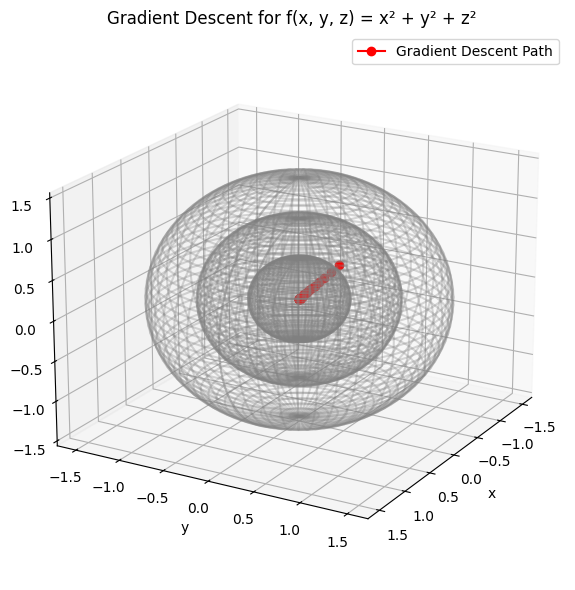

In [43]:
# Visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot a few spherical level sets (like contours)
radii = [0.5, 1.0, 1.5]  # radii for spheres
u = np.linspace(0, 2*np.pi, 50)
v = np.linspace(0, np.pi, 50)

for r in radii:
    x_sphere = r * np.outer(np.cos(u), np.sin(v))
    y_sphere = r * np.outer(np.sin(u), np.sin(v))
    z_sphere = r * np.outer(np.ones_like(u), np.cos(v))
    # Plot the wireframe for the sphere contour
    ax.plot_wireframe(x_sphere, y_sphere, z_sphere, color='gray', alpha=0.3)

# Plot the gradient descent path
ax.plot(x_hist_3d, y_hist_3d, z_hist_3d, 'ro-', label="Gradient Descent Path")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Gradient Descent for f(x, y, z) = x² + y² + z²")

# Adjust the viewing angle for better visualization
ax.view_init(elev=20, azim=30)
ax.legend()
plt.tight_layout()
plt.show()

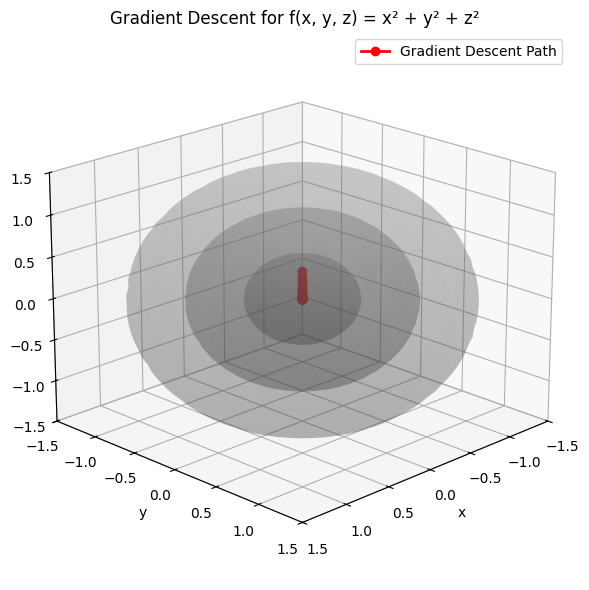

In [44]:
# Other visualization (isometric, different alpha levels, no mesh)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot just a few spherical level sets with a surface instead of a wireframe
radii = [0.5, 1.0, 1.5]
phi = np.linspace(0, np.pi, 50)
theta = np.linspace(0, 2*np.pi, 50)
phi, theta = np.meshgrid(phi, theta)

for r in radii:
    # Parametric equations for a sphere
    x_sphere = r * np.sin(phi) * np.cos(theta)
    y_sphere = r * np.sin(phi) * np.sin(theta)
    z_sphere = r * np.cos(phi)

    # Plot a semi-transparent sphere
    ax.plot_surface(x_sphere, y_sphere, z_sphere, 
                    rstride=2, cstride=2, color='gray', alpha=0.2, linewidth=0)

# Plot the gradient descent path
# Use thicker line and bigger markers to highlight it
ax.plot(x_hist_3d, y_hist_3d, z_hist_3d, 
        marker='o', markersize=6, markerfacecolor='red', 
        markeredgecolor='red', linewidth=2, color='red', label="Gradient Descent Path")

# Set axis labels and title
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Gradient Descent for f(x, y, z) = x² + y² + z²")

# Adjust view angle and axis limits for clarity
ax.view_init(elev=20, azim=45)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

ax.legend()
plt.tight_layout()
plt.show()

In [45]:
# Plot the gradient descent path with prominent markers
ax.plot(x_hist_3d, y_hist_3d, z_hist_3d, 
        marker='o', markersize=6, markerfacecolor='red', 
        markeredgecolor='red', linewidth=2, color='red', label="Gradient Descent Path")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Gradient Descent for f(x, y, z) = x² + y² + z²")
ax.view_init(elev=20, azim=45)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)
ax.legend()
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

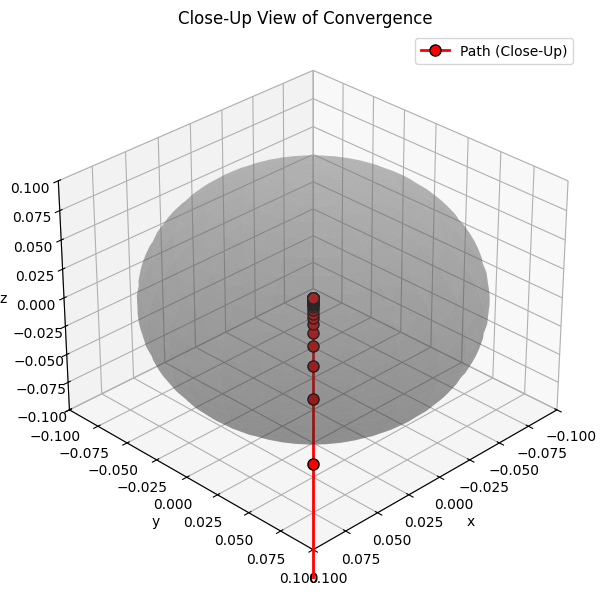

In [46]:
# Secondary Plot: Zoomed-In View Near the Converged Point
fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.add_subplot(111, projection='3d')

# Focus on a tight range around the origin
zoom_range = 0.1

# Plot a very small sphere to represent a tiny level set
r_small = 0.1  # this corresponds to f(x,y,z)=0.01
x_small = r_small * np.sin(phi) * np.cos(theta)
y_small = r_small * np.sin(phi) * np.sin(theta)
z_small = r_small * np.cos(phi)

ax2.plot_surface(x_small, y_small, z_small, 
                 rstride=2, cstride=2, color='gray', alpha=0.3, linewidth=0)

# Plot only the last several steps of the path once close to the origin
# or just the full path - it should be small now anyway
ax2.plot(x_hist_3d, y_hist_3d, z_hist_3d, 
         marker='o', markersize=8, markerfacecolor='red', 
         markeredgecolor='black', linewidth=2, color='red', label="Path (Close-Up)")

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.set_title("Close-Up View of Convergence")
ax2.set_xlim(-zoom_range, zoom_range)
ax2.set_ylim(-zoom_range, zoom_range)
ax2.set_zlim(-zoom_range, zoom_range)
ax2.view_init(elev=30, azim=45)
ax2.legend()
plt.tight_layout()
plt.show()

c:\Users\rini\DATA\git-stash\Master-AI_repos\MAI-NUM-course\.venv\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
MovieWriter imagemagick unavailable; using Pillow instead.


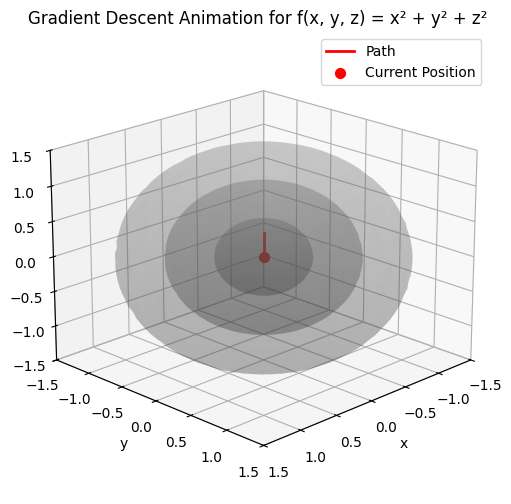

In [ ]:
from matplotlib.animation import FuncAnimation
# Create figure and 3D axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot a few spherical level sets
radii = [0.5, 1.0, 1.5]
phi = np.linspace(0, np.pi, 50)
theta = np.linspace(0, 2*np.pi, 50)
phi, theta = np.meshgrid(phi, theta)

for r in radii:
    x_sphere = r * np.sin(phi) * np.cos(theta)
    y_sphere = r * np.sin(phi) * np.sin(theta)
    z_sphere = r * np.cos(phi)
    ax.plot_surface(x_sphere, y_sphere, z_sphere, 
                    rstride=2, cstride=2, color='gray', alpha=0.2, linewidth=0)

# Adjust plot settings
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Gradient Descent Animation for f(x, y, z) = x² + y² + z²")
ax.view_init(elev=20, azim=45)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

# Initialize the line and point for the path
path_line, = ax.plot([], [], [], 'r-', linewidth=2, label="Path")
current_point = ax.scatter([], [], [], s=50, c='red', label="Current Position")

ax.legend()

def init():
    # Initialize empty data for path line and point
    path_line.set_data([], [])
    path_line.set_3d_properties([])
    current_point._offsets3d = ([], [], [])
    return path_line, current_point

def update(frame):
    # frame goes from 0 to len(x_hist_3d)-1
    # Show the path up to 'frame'
    path_line.set_data(x_hist_3d[:frame+1], y_hist_3d[:frame+1])
    path_line.set_3d_properties(z_hist_3d[:frame+1])
    
    # Update current point position
    current_point._offsets3d = ([x_hist_3d[frame]], [y_hist_3d[frame]], [z_hist_3d[frame]])

    return path_line, current_point

# Create the animation
anim = FuncAnimation(fig, update, frames=len(x_hist_3d), init_func=init, blit=False, interval=300)
anim.save('gradient_descent_3d.gif', writer='Pillow', fps=2)
plt.show()

MovieWriter Pillow unavailable; using Pillow instead.


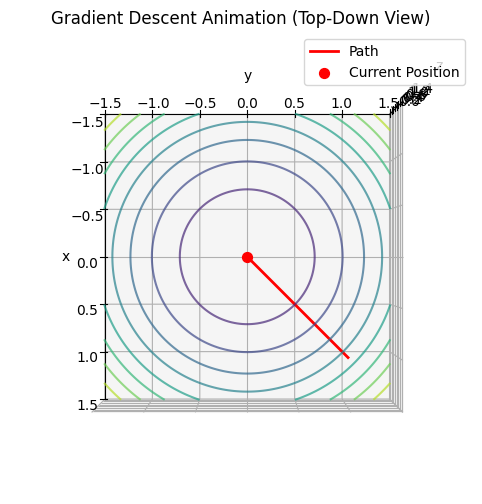

In [51]:
# For visualization:
# We'll show a top-down view (looking along the z-axis) so that
# the plot effectively becomes a 2D representation of x and y.
# We'll draw contour lines of f(x, y, z=0) = x^2 + y^2
# to illustrate the level sets in the xy-plane.

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Generate contour data for f(x,y,0) = x^2 + y^2
x_vals = np.linspace(-1.5, 1.5, 100)
y_vals = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z_plane = X**2 + Y**2  # f(x,y,0)
# We'll just show these as contours on the xy-plane (z=0).
# To do that, we set z=0 and plot contour lines in a 3D plot.
cset = ax.contour(X, Y, Z_plane, zdir='z', offset=0, levels=10, cmap='viridis', alpha=0.7)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Gradient Descent Animation (Top-Down View)")

# Set the view to top-down (looking from above)
ax.view_init(elev=90, azim=0)

# Set the z-limits to show just a little space (though top-down, not much needed)
ax.set_zlim(-0.1, 1.5)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# Initialize the line and point
path_line, = ax.plot([], [], [], 'r-', linewidth=2, label="Path")
current_point = ax.scatter([], [], [], s=50, c='red', label="Current Position")

ax.legend()

def init():
    path_line.set_data([], [])
    path_line.set_3d_properties([])
    current_point._offsets3d = ([], [], [])
    return path_line, current_point

def update(frame):
    # Show path up to this frame
    path_line.set_data(x_hist_3d[:frame+1], y_hist_3d[:frame+1])
    path_line.set_3d_properties(z_hist_3d[:frame+1])
    
    # Current point
    current_point._offsets3d = ([x_hist_3d[frame]], [y_hist_3d[frame]], [z_hist_3d[frame]])

    return path_line, current_point

anim = FuncAnimation(fig, update, frames=len(x_hist_3d), init_func=init, blit=False, interval=300)
anim.save('gradient_descent_3d_top_down.gif', writer='Pillow', fps=2)
plt.show()

c:\Users\rini\DATA\git-stash\Master-AI_repos\MAI-NUM-course\.venv\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


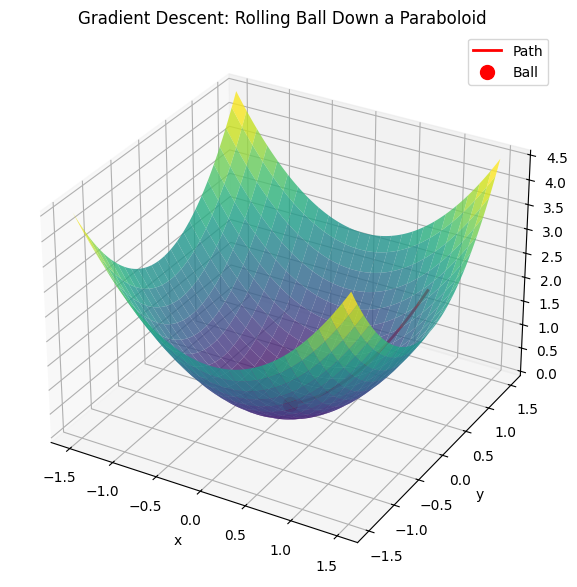

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Define the function and gradient
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return 2*x, 2*y

def gradient_descent(f, grad_f, x0, y0, gamma=0.1, tol=1e-6, max_iter=100):
    x, y = x0, y0
    x_hist, y_hist = [x], [y]
    for _ in range(max_iter):
        gx, gy = grad_f(x, y)
        x_new = x - gamma * gx
        y_new = y - gamma * gy
        if np.sqrt((x_new - x)**2 + (y_new - y)**2) < tol:
            x, y = x_new, y_new
            x_hist.append(x)
            y_hist.append(y)
            break
        x, y = x_new, y_new
        x_hist.append(x)
        y_hist.append(y)
    return x_hist, y_hist

# Run gradient descent from an initial point
x0, y0 = 1.0, 1.0
x_hist, y_hist = gradient_descent(f, grad_f, x0, y0, gamma=0.1)

# Create a fine grid for the surface
X = np.linspace(-1.5, 1.5, 100)
Y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# Set up the figure and 3D axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, cmap='viridis', alpha=0.8, edgecolor='none')

# Plot initial path line (empty for now)
path_line, = ax.plot([], [], [], 'r-', linewidth=2, label='Path')

# Plot the ball (current position) as a scatter
ball = ax.scatter([], [], [], s=100, c='red', label='Ball')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Gradient Descent: Rolling Ball Down a Paraboloid')

# Set viewing angle
ax.view_init(elev=30, azim=-60)

# Define interpolation between steps for smoother animation
# Instead of jumping directly from one computed step to the next,
# we can move in small increments to simulate continuous motion.
frames_per_step = 10
xs_smooth = []
ys_smooth = []
for i in range(len(x_hist)-1):
    xs_smooth.extend(np.linspace(x_hist[i], x_hist[i+1], frames_per_step, endpoint=False))
    ys_smooth.extend(np.linspace(y_hist[i], y_hist[i+1], frames_per_step, endpoint=False))
# Add the final point
xs_smooth.append(x_hist[-1])
ys_smooth.append(y_hist[-1])

def init():
    path_line.set_data([], [])
    path_line.set_3d_properties([])
    ball._offsets3d = ([], [], [])
    return path_line, ball

def update(frame):
    # current frame position
    x_curr = xs_smooth[frame]
    y_curr = ys_smooth[frame]
    z_curr = f(x_curr, y_curr)

    # Update path line up to current frame
    path_line.set_data(xs_smooth[:frame+1], ys_smooth[:frame+1])
    path_line.set_3d_properties([f(xx, yy) for xx, yy in zip(xs_smooth[:frame+1], ys_smooth[:frame+1])])

    # Update ball position
    ball._offsets3d = ([x_curr], [y_curr], [z_curr])

    return path_line, ball

anim = FuncAnimation(fig, update, frames=len(xs_smooth), init_func=init, blit=False, interval=100)
anim.save('gradient_descent_2d.gif', fps=20)
plt.legend()
plt.tight_layout()
plt.show()